# Using Pandas data frames to analyze single cell electrophysiology data

<img src="http://www.zocalopublicsquare.org/wp-content/uploads/2016/12/Mathews-on-US-China.jpg" width="300" height="300" />

## Day 3 outline

#### Background: 
Today we will analyze patch-clamp data from a single PV neuron in a mouse cortical slice. The experiment we will analyze was performed in current clamp. The experimenter injected 20 different square pulses of current and recorded the voltage response of the neuron to each pulse. Using the data from this experiment, we will create and F-I (frequency-current) curve.

#### 3.0) Import statements

#### 3.1) More on functions
* Review from section 2.1 on day 2: what are functions, why are they useful, how to write them
* More complicated excercise

#### 3.2) For-loops and if-else statements
* An introduction to basic flow control in python using for-loops and if-else statements

#### 3.3) Load single cell electrophysiology data from csv file
* Visualize loaded data with seaborn
* Inspect data using pandas

#### 3.4) Analyze a single sweep of electrophysiology data
* Calculate the firing rate of the neuron during a single sweep of data

#### 3.5) Create an F-I (frequency - current) curve
* Write a function to calculate firing frequency during one sweep (3.4)
* Employ function in a for-loop to perform the operation for all sweeps

## 3.0) Import statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.signal as ss
from __future__ import absolute_import, division, print_function

## 3.1) Functions
* Often when you are writing code, you will find that there are certain operations that you want to perform repetively, only, you want to change the parameters of the operation each time you run it. Functions are great for this. 


Taking the average of a list of numbers is a great, simple example. You can easily write the following line of code:

In [2]:
my_numbers = [1,4,6,2]
total = my_numbers[0]+my_numbers[1]+my_numbers[2]+my_numbers[3]
average = total/4
print(average)

3.25


This works. But it's a pain in the butt. What if we have new list of numbers we want the average of but this list has 5 entries instead of 4? Rather than copy and paste all the code above, add my_numbers[4], and change 4 to 5, we can write a function that performs the operation automatically for us:

In [3]:
def average_nums_in_list(my_l):
    av = sum(my_l)/len(my_l)           # len and sum are built in python functions
    return av

my_new_list = [1,1,3,2,2,6,7,10,3]
print(average_nums_in_list(my_numbers))
print(average_nums_in_list(my_new_list))

3.25
3.88888888889


Now, every time I want the average of a list of numbers I just have to call "average_nums_in_list" and tell it the list of numbers.

#### Note: 
* Inside this function, we use two other functions (sum and len)! These are built in python functions. Notice how they help clean up the code from cell 3


This is a nice example of why functions can be nice. However, simple things like taking a sum, finding the length of list, and even taking an average (see below and/or numpy documentation on "mean()" https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.mean.html) are almost always already defined in python or in some other python module (ex: numpy)

In [4]:
print(np.mean(my_numbers))    # using numpy.mean to compute the average
print(np.mean(my_new_list))

3.25
3.88888888889


### Exercise
We'll practice writing more of our own functions in a litte bit. For now, let's try using some built in python functions.
* Use numpy.std and numpy.mean to calculate the standard deviation and mean of all columns in the given 2-D matrix ("data_m")
    * https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.mean.html
    * https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.std.html

In [5]:
data_m = np.random.rand(100,10)    # intitalize data matrix
print(data_m.shape)                # 100 rows X 10 columns

(100, 10)


In [6]:
# Compute the mean over the 10 columns and print this array of 10 values
means = 
# Compute the standard deviation over the 10 columns and print this array
stds = 

SyntaxError: invalid syntax (<ipython-input-6-e776b3ab7d1d>, line 2)

Bonus: Use matplotlib's bar plot to plot the means and standard deviations for the 10 columns
* https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html
* Hint: What should 'x' look like if you have 10 columns? - This: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.arange.html  might help
* Note: Recall from day-2 that seaborn/pandas can really be much better for this sort of thing. This exercise is just here to point out that matplolib exists too, and that there is always more than one way of doing things!

In [ ]:
plt.figure()
plt.bar()      # fill in the correct arguments
plt.show()

* These are all good illustrations of how functions can work, and how we can use online documentation to use predefined function in the way we like. In practice, we often want to write a function that does something a little more complex and stereotyped to our analysis. We'll see more about this later, but for now some examples to think about:
    * perform leak subtraction
    * compute firing rate (more on this later)
    * calcuate input resistance 

## 3.2) for-loops and if-else statements
* for-loops are excellent when you want to iterate over all elements in some sort of data object (list, array, data frame etc.)
* Within these loops, often we only want to perform an operation on the current element when a specific condition is met. For this, we use if-else statements.
* The following examples are meant to walk through the basics of flow control in python by looping over all columns in the pandas data frame defined below:

In [7]:
data = np.random.rand(100,10)
cols = ['one','two','three','four','five','six','seven','eight','nine','ten']
df = pd.DataFrame(columns = cols, index = np.arange(0,100,1), data = data)
df.head(5)

,one,two,three,four,five,six,seven,eight,nine,ten
0,0.405780,0.909197,0.732346,0.994069,0.176569,0.898015,0.958525,0.430074,0.671699,0.015479
1,0.407192,0.577216,0.205996,0.483443,0.223394,0.349633,0.270704,0.828705,0.551785,0.596776
2,0.120936,0.880473,0.640378,0.128341,0.070995,0.994895,0.400658,0.736684,0.406004,0.668226
3,0.987956,0.519802,0.207493,0.355011,0.204998,0.996919,0.744262,0.624648,0.813776,0.543065
4,0.885802,0.175092,0.184657,0.769210,0.711373,0.857923,0.818606,0.736578,0.197493,0.885043


* First, write a loop that simply goes through all the column names in df and prints them out

In [8]:
cols = df.columns # list of all column names in the df above

for c in cols:
    print(c)

one
two
three
four
five
six
seven
eight
nine
ten


* Another way to achieve this is:

In [9]:
for i in np.arange(0, 10,1):
    print(i)
    print(cols[i])

0
one
1
two
2
three
3
four
4
five
5
six
6
seven
7
eight
8
nine
9
ten


* Python also lets us combine both of the above examples using enumerate:

In [10]:
for i, col in enumerate(cols):
    print(i)
    print(col)

0
one
1
two
2
three
3
four
4
five
5
six
6
seven
7
eight
8
nine
9
ten


Great, we can loop through all the elements of an object (list of column names). Now, let's only perform the print operation for odd numbered columns:

In [11]:
for i, col in enumerate(cols):
    if (i+1)%2==0:              # notice that i starts counting from 0, so we must add 1
        pass
    else:
        print(col)

one
three
five
seven
nine


Now that we understand the basics of flow control functions, let's try to combine the two to write a slightly more complex function.

### Exercise
Fill in the missing fields of the function below so that it returns the means and standard deviations of either the odd numbered columns, over even numbered columns, of "df", in dictionary format.

* Optional arguments - As you might have noticed when looking through the documentation for numpy.mean and numpy.std, some functions take optional arguments (arguments that have default values but can be changed by the user if desired). Here we'll learn how to write a function this way.
* Dictionaries - Recall your work from section 1.6 on day 1. Dictionary pair keys with a data object e.g. mydict['mean'] could return list of mean values and mydict['std'] could return list of standard deviation values

In [12]:
def my_complex_function(dataframe, cols='even'):   # note that the default value of columns is even
    
    mydict = {}             # intitalize an empty dictionary to store results
    mydict['mean'] = []     # intialize empty list to store means
    mydict['std'] = []      #intialize empty list to store stds
    
    columns =   # define list of columns from the df
    
    if cols=='even':
        # this is where you should loop through all even columns
        for  in :
            if :
                mydict['mean'].append()
                mydict['std'].append()
            else:
                pass
            
    elif cols=='odd':
        # this is where you should loop through all odd columns
        for  in :
            if :
                mydict['mean'].append()
                mydict['std'].append()
            else:
                pass
            
    return(mydict)     # return results


# ==== Call the function ====
my_complex_function(df,cols='odd')   # can set cols to be 'odd' or 'even'

SyntaxError: invalid syntax (<ipython-input-12-5e19f45ad4b5>, line 7)

## 3.3) Load singel cell electrophysiology data from .csv file

#### Set file path to day-2 of the python_neurobootcamp
* The 'path' is the list of directories that lead to your file. For example, if I saved something onto the dekstop of my computer call "test.py", the path to this file is "/home/charlie/Desktop/" and the filename is "test.py"
    * If you are unsure of the path to your files. You can check by using a file explorer to navigate to the file, right click on it, and view properites. The path should be listed here (I'm a windows/linux user - not sure how it works for mac)
    * The separator (in this case it is a "/") will depend on your operating system: ("/" - Linux/mac?, "\" windows) 
* When loading data, it is nice to set one file path that leads to all your data files. Therefore, when you're saving data be conscientious of where you store your files.
* IMPORTANT - Also be conscientious of how you name your files. This can be critical for writing robust, reliable scripts

In [13]:
path = '/home/charlie/Desktop/python_bootcamp/python_neurobootcamp/day-3/csv_data/'

#### The data:
As those of you who do patch clamp know, e-phys data doesn't come nicely packaged into a simple spreadhsheet format. Therefore, we have written a function that converts axon binary files (.abf) into spreadheet format (.csv) for the pruposes of this course. If you are interested in exactly how this process works, look into the file: binary_file_loading_tools.py in the day-3 directory. It's a little bit rough, but will help give you an idea of how you can convert binary files to spreadsheets. After completing this course, you should be able to modify this to suit your needs.

CSV = Comma-Separated Value file that stores tabular data (numbers and text) in plain text. You can save an excel spreadsheet in .csv and then import it in Python. Let's look at an example. (open up csv file from the day-3/csv_data folder in excel)

#### Load spreadsheet data into pandas
Note the use of index_col=0. Try to get ride of this and see what happens when you load based on default settings. For more information: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [14]:
meta = pd.read_csv(path+"meta_data_PV_3_10_03_2014.csv", index_col=0)
data = pd.read_csv(path+"data_PV_3_10_03_2014.csv",index_col=0)

To take a peak at our data, we can type the name of our data frame, followed by ".head()". This will show us the first 5 rows of the data in spreadsheet format. 

In [15]:
meta.head()

,fs,celltype,date,ch1_units,ch2_units
sweep1,100000.0,PV,10_03_2014,mV,pA
sweep2,100000.0,PV,10_03_2014,mV,pA
sweep3,100000.0,PV,10_03_2014,mV,pA
sweep4,100000.0,PV,10_03_2014,mV,pA
sweep5,100000.0,PV,10_03_2014,mV,pA


Notice that in our meta data, we have information about the sampling rate (fs), celltype, date of recording, units for ch1 data, and units for ch2 data for each sweep in the binary file that we loaded. This information will become particulalrly useful for analyses where, for example, we want to group anlayses by cell type.

In [16]:
data.head()

,ch1_sweep1,ch2_sweep1,ch1_sweep2,ch2_sweep2,ch1_sweep3,ch2_sweep3,ch1_sweep4,ch2_sweep4,ch1_sweep5,ch2_sweep5,...,ch1_sweep16,ch2_sweep16,ch1_sweep17,ch2_sweep17,ch1_sweep18,ch2_sweep18,ch1_sweep19,ch2_sweep19,ch1_sweep20,ch2_sweep20
0.00000,-48.889160,0.0,-49.652100,0.0,-49.224854,0.0,-48.675537,0.0,-48.187256,0.0,...,-51.330566,0.0,-52.947998,0.0,-55.236816,0.0,-52.856445,0.0,-53.619385,0.0
0.00001,-49.011230,0.0,-49.926758,0.0,-49.194336,0.0,-48.583984,0.0,-47.912598,0.0,...,-51.300049,0.0,-52.947998,0.0,-55.206299,0.0,-52.917480,0.0,-53.466797,0.0
0.00002,-49.072266,0.0,-49.743652,0.0,-49.255371,0.0,-48.400879,0.0,-47.882080,0.0,...,-51.086426,0.0,-52.856445,0.0,-55.023193,0.0,-53.100586,0.0,-53.833008,0.0
0.00003,-48.980713,0.0,-49.682617,0.0,-49.163818,0.0,-48.492432,0.0,-48.095703,0.0,...,-50.994873,0.0,-52.917480,0.0,-55.023193,0.0,-52.917480,0.0,-53.833008,0.0
0.00004,-49.041748,0.0,-49.774170,0.0,-49.041748,0.0,-48.553467,0.0,-48.065186,0.0,...,-51.422119,0.0,-53.100586,0.0,-55.358887,0.0,-52.886963,0.0,-53.619385,0.0


Though the channels aren't labeled, we can determine what each represents by the their units (pico-amps or milli-volts in this case) which we can get above (in meta data).

Notice that data contains the time series for each channel on each sweep. The indexes here represent the time points that each value was acquired at.

#### Some quick pandas tricks for inspecting data frames
* Some of this might be review from yesterday, but nice to keep in mind

In [17]:
# Let's check out the meta data frame

# What is the shape of the data?
print('Shape of data:')
print(data.shape)

# How many sweeps are there?
print('Rows in meta:')
print(meta.index)

# To only see the number, try:
print('Number of sweeps:')
print(len(meta.index))

# What information do we have about each sweep? i.e. what are the column names?
print('Columns in meta:')
print(meta.columns)

# Can I see only the information for one column?
cols = meta.columns
firstCol = cols[0]
OneCol = meta[firstCol]
OneCol.head()

Shape of data:
(100000, 40)
Rows in meta:
Index([u'sweep1', u'sweep2', u'sweep3', u'sweep4', u'sweep5', u'sweep6',
       u'sweep7', u'sweep8', u'sweep9', u'sweep10', u'sweep11', u'sweep12',
       u'sweep13', u'sweep14', u'sweep15', u'sweep16', u'sweep17', u'sweep18',
       u'sweep19', u'sweep20'],
      dtype='object')
Number of sweeps:
20
Columns in meta:
Index([u'fs', u'celltype', u'date', u'ch1_units', u'ch2_units'], dtype='object')


sweep1    100000.0
sweep2    100000.0
sweep3    100000.0
sweep4    100000.0
sweep5    100000.0
Name: fs, dtype: float64

#### Visualize the raw data that was imported
Before we get into analysis, it's always a good idea to inspect your raw data to make sure you know what's there, and that it was loaded properly.

First let's use Pandas built-in filter function to assign all ch1 traces to a DataFrame called `voltage_traces` and all ch2 traces to a DataFrame called `current_traces`.

Here we use regular expressions. These can be very confusing at first, don't worry. But, they are very powerful and worth spending some time getting used to. For more information: https://docs.python.org/2/library/re.html

In [18]:
# Using regular expressions to filter
voltage_traces = data.filter(regex="ch1.", axis=1)   # if you wanted to filter on rows instead of columns, use axis=0
current_traces = data.filter(regex="ch2.",axis=1)

Plotting both the current traces and the voltage traces using matplotlib.
ADD INTRO TO WHAT MATPLOTLIB IS USED FOR AND PERHAPS BREAK THE FOLLOWING CELL INTO MULTIPLE CELLS WITH MARKDOWN EXLPANATION FOR EACH STEP.

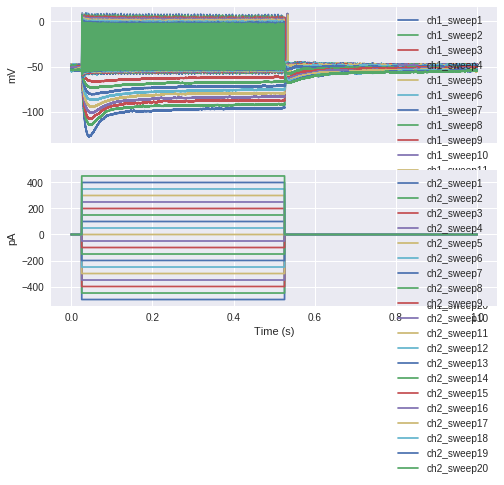

In [19]:
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(voltage_traces) # Pandas allows you to simply plot a set of columns of data.
ax[0].set_ylabel(meta['ch1_units'][0]) # Can label axis using the information from our meta data frame
ax[0].legend(voltage_traces.columns, loc='upper right') # Pandas "knows" the names of each columns you plotted, 
                                                        # which makes creating a legend straightforward

ax[1].plot(current_traces) 
ax[1].set_ylabel(meta['ch2_units'][0])
ax[1].set_xlabel('Time (s)')
ax[1].legend(current_traces.columns, loc='upper right')
plt.show()

This is really messy.
#### Excercise: 
Try plotting only the last sweep of both current and voltage so that we can see what's going on more easily.

* First find the column name for the last sweep  using the "tricks" above (there are multiple ways to do this):

In [20]:
lastSweep_voltage = voltage_traces.columns[-1]
lastSweep_current = current_traces.columns[-1]

print(lastSweep_voltage)
print(lastSweep_current)

ch1_sweep20
ch2_sweep20


* Now, use these  column id's to select only the columns containing data for the last sweep:

In [21]:
last_voltage = voltage_traces[lastSweep_voltage]
last_current = current_traces[lastSweep_current]

* Use these column id's to only plot the traces for these sweeps:

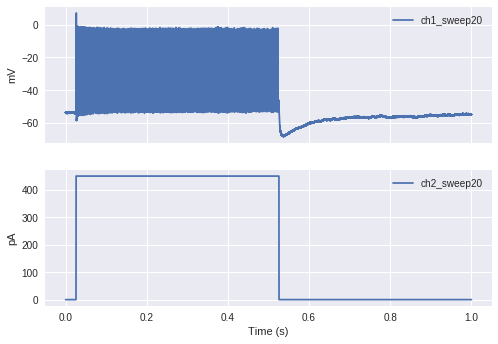

In [22]:
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(last_voltage)
ax[0].set_ylabel(meta['ch1_units'][0])
ax[0].legend([lastSweep_voltage], loc='upper right')
ax[1].plot(last_current)
ax[1].set_ylabel(meta['ch2_units'][0])
ax[1].set_xlabel('Time (s)')
ax[1].legend([lastSweep_current], loc='upper right')
plt.show()

That looks better, but can we zoom in on some of the spikes in the voltage traces?

#### Excercise
* Plot only time points from 0.02 to 0.10 seconds:

In [23]:
# define the range if indexes you want to select
inds = data.index[(0.02<data.index) & (data.index < 0.1)]

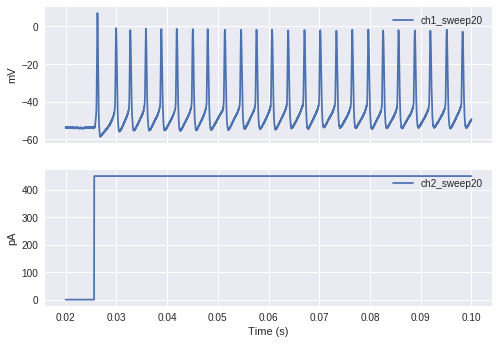

In [24]:
# Now repeat the plot above, only for the given indeces
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(last_voltage[inds])
ax[0].set_ylabel(meta['ch1_units'][0])
ax[0].legend([lastSweep_voltage], loc='upper right')
ax[1].plot(last_current[inds])
ax[1].set_ylabel(meta['ch2_units'][0])
ax[1].set_xlabel('Time (s)')
ax[1].legend([lastSweep_current], loc='upper right')
plt.show()

# Data Analysis for a single cell

A common way to show a neuron's response to input is to make a frequency-intensity curve (F-I curve).  The frequency of firing is plotted on the y-axis and the amplitude of the current injection that caused the spikes is plotted on the x-axis.  

From looking at these F-I curves you can identify if the cell is transiently firing, whether the spike rate reaches a maximum at some high current step, the gain of firing (the slope of the line, in Hz/pA), etc.  To construct a F-I curve we need to first find the number of spikes in each sweep and the current injection that drove those spikes. Then plot it.

## Get firing rate of single sweep
First, we will perform the analysis for just one sweep of data. Then we will define a function to automate the process, run the function on all sweeps using a for-loop, and plot the results in a F-I curve.  

Becasue we have already pulled out the last voltage trace, let's go ahead and analyze this time-series first.

BEFORE YOU JUMP INTO STEP 1 MAYBE OUTLINE WHAT YOU ARE GOING TO DO.

#### Step 1: Locate the time points of all spikes
* There are a couple of ways to do this. We will do it by locating the relative maxima of the voltage trace during the current injection
* We will also set a threshold above which to detect maxima (to avoid counting maxima in the baseline as a spikes)

In [25]:
threshold = -20  

# Threshold the voltage trace to get rid of the noise floor. (If we didn't do this, we'd find 
# a bunch of "spikes" (relative maxima) in the noise - change the threshold to zero to see 
# what this would look like). THIS IS A BIT CONFUSING. IF WE CHANGED THE THRESHOLD TO ZERO 
# WE WOULD NOT GET MORE SPIKES BUT FEWER. ALSO FOR THIS TRACE IT SEEMS LIKE THRESHOLDING IS NOT
# CRITICAL FOR PICKING UP NOISE FLOOR AS THE SPIKES ARE SO CLEAR. MAYBE A BETTER WAY OF POINTING
# THIS OUT WOULD BE TALKING ABOUT WHY -20 THRESHOLD WORKS AND 0 WOULD NOT, ESPECIALLY IF YOUR 
# INPUT RESISTANCE IS NOT GREAT OR DECAYS DURING THE EXPERIMENTS MAKING YOUR PEAK SPIKE AMPLITUDE
# SMALLER?

last_voltage_thresholded = last_voltage[last_voltage>threshold]  

# MAYBE PLOTTING THIS THIS WOULD HELP UNDERSTAND WHAT HAPPEND?

*Scipy*, another Python useful package, has a nice function that finds the indices where relative maxima occur: `argrelextrema`
This function takes two required arguments: data and comparator (for details see [documentation](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.signal.argrelextrema.html)).

Note: `last_voltage_thresholded` is a Pandas DataFrame. `argrelextrema` expects data to be an Array, not a DataFrame.
Note: `argrelextrema` also takes an optional argument: "order" that specifies the amount of points on each size to use for the comparison.

In [26]:
# Note the use of .values in this function call. scipy is expecting the data to be in the 
# form of an Array
# I WOULD SUGGEST BREAKING THIS DOWN A BIT, TRY TO DO IT W/O TRANSFORMIRNG, GET AN ERROR,
# CHECK THE TYPE AND THEN TRANSFORM. THIS IS GOOD EDUCATIONAL OPPORTUNITY! WHAT'S NP.GREATER?
# ALSO MAYBE NOT GOOD TO CALL THIS VARIABLE "i" BUT USE SOMETHING MORE EXPLANATORY.
i = ss.argrelextrema(data=last_voltage_thresholded.values, comparator=np.greater,order=1)

# The Scipy function returns indexes i.e. 1,2 3... BUT we want the time points 
# (which are stored in the index of our DataFrame)
spike_times = last_voltage_thresholded.index[i] 

A last, finer point on physiology: It's possible that the voltage trace is a little noisy, even during a spike. This might cause a spike to be double counted by the Scipy function. To fix these cases, we impose a constraint based on the refractory period of neuron.

In [27]:
refractory_period_low_limit = 0.002  # 2ms is a lower limit on the refracotry period for a neuron
interspike_interval = np.ediff1d(spike_times)
# EXPLAIN WHAT THIS FUNCTION IS AND DOES AND ADD LINK TO DOCUMENTATION OR SHOW HOW TO FIND OUT
# ABOUT THIS ON THE NOTEBOOK
VIOLATION_indexes = np.argwhere(interspike_interval<refractory_period_low_limit)
spike_times = spike_times.delete(VIOLATION_indexes)

Let's plot this to see if we successfully found the spikes:

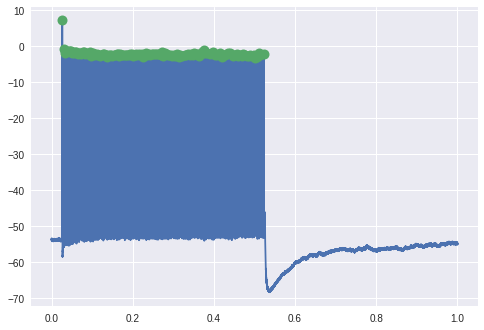

In [28]:
plt.figure()
plt.plot(last_voltage)
plt.plot(spike_times, last_voltage[spike_times], ".", markersize=20) # plot a point at each time point where a spike was detected
plt.show()

# print out spike times so they can see what is actually in a variable

This is looking pretty good. 

### Excercise
What happens if you now change the threshold to -60 and re-run the 4 cells above?
WHAT'S THE POINT OF THIS EXERCISE??

##### Let's zoom in on the trace to make sure we are in fact locating all the spikes

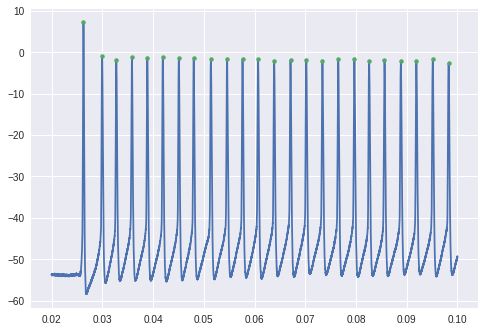

In [29]:
plt.figure()
plt.plot(last_voltage[inds])
plt.plot(last_voltage[inds][spike_times],".",markersize=9)
plt.show()

Great, looks like we are capturing all the spikes, not double counting, and not counting any noise as spikes. Let's use these spike times to calculate the firing frequency for this neuron during the current injection

#### Step 2: Find out the time window of current injection
This is pretty straightforward for this experiment because as we saw earlier, it's just square pulse injections.

In [30]:
current_magnitude = max(last_current.values)  
current_inj_times = last_current.index[last_current==current_magnitude] # time points when current is being injected   
current_inj_length = max(current_inj_times) - min(current_inj_times) # duration in seconds
print("Current injection: "+str(current_magnitude)+" pA")

Current injection: 450.0 pA


#### Step 3: Perform a final check on spike times
Before we calculate the firing frequecny, there is one last check we must perform. It is possile that some spontaneous spikes occured outside the current injection window (it didn't happen in this case, but it could and that could change our results). To handle this, we remove all spikes times outside of the current injection window:

In [31]:
# remove all spikes occuring outside the current injection window using a boolean array

tf = (max(current_inj_times)>= spike_times) & (spike_times >= min(current_inj_times)) # boolean array (0's and 1's)
spike_times = spike_times[tf]   # only saving spike times where tf==1 e.g. during current injection

#### Step 4: Calculate the firing rate 
There a couple different ways to calculate firing frequency. They are both useful and tell you different things.  
The most straighforward way is to simply count the number of spikes and divide by the amout of time (in seconds) that the current was being injected.

In [32]:
n_spikes = len(spike_times)
spike_freq = n_spikes/current_inj_length

print("spiking frequency = " + str(round(spike_freq,2))+" Hz")

spiking frequency = 268.0 Hz


The second way to go about this is to calculate the average interspike interval. This is particularly useful if the neuron does not continue to fire or adapts during the current injection.

In [33]:
# There is a nice numpy function to do this for you quickly: ediff1d  (see numpy documentation)
# YOU HAVE ALREADY USED THIS UP AND YOU SHOULD EXPLAIN THIS FUNCTION AND ADD LINK
# DO DOCUMENTATION IN STEP 1
ISI = np.ediff1d(spike_times) #interspike interval

meanISI = np.mean(ISI)  # calculate the mean ISI

spike_freq = 1/meanISI  # ISI is in units of seconds, divide 1s/meanISI to get mean firing frequency
print("spiking frequency = " +str(round(spike_freq,2))+"Hz")

spiking frequency = 267.82Hz


For this cell, both methods give us basially the same result because as we saw above, this neuron fires pretty regularly and consistently during the entire stimulation. This isn't necesarily the case so it's good to check. 

One final check we can perform is just to look at all the raw ISI values to make sure there wasn't a change in frequency over the course of the stimulation (high firing at the beginnning, slower at the end)

### Excercise
Go back and re-run everything from "Step 1" but this time, DO NOT run the cell that correct for refractory period violations. This illustrates why this final histogram can be a good check on your analysis.

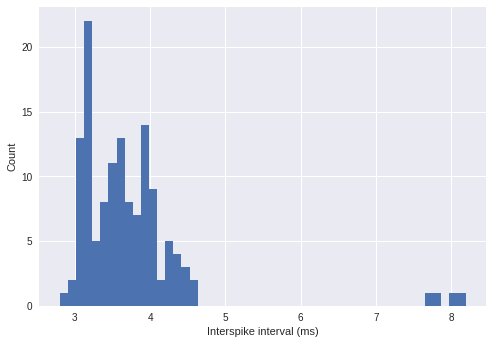

In [34]:
plt.figure()
plt.hist(ISI*1000,bins=50) # convert to ms by multiplying by 1000
plt.ylabel('Count')
plt.xlabel('Interspike interval (ms)')
plt.show()

This looks pretty good with the exception of a few outliers. At the very least, it confirms that there are no refractory period violations. 

### Summary: 
Although what we really want is the F-I curve for the cell, analyzing one sweep at a time, like we did here, is often a good idea. This way, you can make sure that the code you write is really analyzing the data in the way you intend.

### Create an F-I curve for a single cell

* To do this, we will perform the above analysis many times. Once for each current injection/sweep
* Because we are doing the same thing many times, rather than write all of the above code 20 times (once for each sweep), we'll write a "for" loop that performs the same operation many times
* When you are performing an operation many times, it is often nice to write function to perform this operation. We will write a function that returns the firing frequency for any sweep

### Now that you have a general sense of what loops and functions can do, we are ready analyze our data

#### Step 1: Write a function that returns firing rate

In [35]:
def get_firing_rate(v, threshold, tstart, tend, method="ISI"):
    '''
    ================ This is called a doc string ====================
    ========== It tells you how to use the function =================
    Arguments:
        v (data frame): array of voltage values during one sweep with the index being the time series
        threshold (float): cut-off to count spikes
        tstart (float): time current injection begins
        tend (float): time current injection ends
        method (string, optional): method for calculating the firing rate
                ISI: use interspike interval
                AVG: use average over whole current injection window
    Output:
        firing_rate (float): firing rate during the period defined by tstart and tend
    '''
    refractory_limit=0.002 # set refractory period limit (to avoid double counting spikes)
    current_duration = tend-tstart
    
    v_thresh = v[v>threshold]
    
    spike_indexes = ss.argrelextrema(v_thresh.values, np.greater,order=1)  # indices of spikes (0,1,2...)
    spike_times = v_thresh.index[spike_indexes]  # convert to time (in seconds)   
    
    # get rid of refractory violations
    interspike_interval = np.ediff1d(spike_times)
    VIOLATION_indexes = np.argwhere(interspike_interval<refractory_limit)
    spike_times = spike_times.delete(VIOLATION_indexes)    # delete any spike times that occured too soon after a previous spike
    
    # get rid of spikes outside the current injection window
    tf = (tend >= spike_times) & (spike_times >= tstart) # boolean array (0's and 1's)
    spike_times = spike_times[tf]   # only saving spike times where tf==1 e.g. during current injection
    
    if method=="ISI":
        # calculate the firing frequency using interspike interval
        # in case there were no spikes, set firing rate to 0 Hz
        if spike_times.size==0:
            firing_rate=0  # there were no spikes, so firing rate is 0
        else:
            ISI = np.mean(np.ediff1d(spike_times))
            firing_rate = 1/ISI
    elif method=="AVG":
        firing_rate = len(spike_times)/current_duration
    
    return firing_rate

There is alot going on in that function. If you are confused on any part of it, please ask the instructor or TAs for assitance. 
* You should understand how the function works, and how to modify it if you need/want to
* You should understand the if-else statements at the end of the function definition

#### Step 2: Write a for-loop to calculate the firing rate for each sweep of data
* First let's intitalize some constants that we will use throughout the analysis

In [36]:
threshold = -20   # set threshold above which to detect spikes

# current duration is the same for all sweeps (we saw this above when we plotted all the traces) so let's just use the one
# from the last sweep:
current_magnitude = max(last_current.values)  
current_inj_times = last_current.index[last_current==current_magnitude]  # time points when current is being injected  
I_start = min(current_inj_times)
I_end = max(current_inj_times)
current_duration = max(current_inj_times) - min(current_inj_times)      # duration in seconds   

* Loop over all the sweeps, find the current magnitude and firing rate, print them out

In [38]:
# loop over all the sweeps in this experiment
sweeps = meta.index
for i, sweep in enumerate(sweeps):
    
    # Call our function that we just wrote for finding firing rate    
    firing_rate = get_firing_rate(data['ch1_'+sweep], threshold, I_start, I_end, method="ISI")  
    
    # get current injection magnitude
    # Note how we deal with negative current injections using if-else statements
    I_mag = max(data['ch2_'+sweep])
    if I_mag == 0 and min(data['ch2_'+sweep])==0:
        I_mag = 0
    elif I_mag == 0 and min(data['ch2_'+sweep]) != 0:
        I_mag = min(data['ch2_'+sweep])
    
    # print the result
    print(sweep+":  "+"I: "+str(I_mag)+" "+meta['ch2_units'][i]+ ",   Firing rate: "+str(firing_rate)+" Hz")

sweep1:  I: -500.0 pA,   Firing rate: 0 Hz
sweep2:  I: -450.0 pA,   Firing rate: 0 Hz
sweep3:  I: -400.0 pA,   Firing rate: 0 Hz
sweep4:  I: -350.0 pA,   Firing rate: 0 Hz
sweep5:  I: -300.0 pA,   Firing rate: 0 Hz
sweep6:  I: -250.0 pA,   Firing rate: 0 Hz
sweep7:  I: -200.0 pA,   Firing rate: 0 Hz
sweep8:  I: -150.0 pA,   Firing rate: 0 Hz
sweep9:  I: -100.0 pA,   Firing rate: 0 Hz
sweep10:  I: -50.0 pA,   Firing rate: 0 Hz
sweep11:  I: 0 pA,   Firing rate: 0 Hz
sweep12:  I: 50.0 pA,   Firing rate: 91.3232876712 Hz
sweep13:  I: 100.0 pA,   Firing rate: 118.079399011 Hz
sweep14:  I: 150.0 pA,   Firing rate: 145.729830385 Hz
sweep15:  I: 200.0 pA,   Firing rate: 166.198832543 Hz
sweep16:  I: 250.0 pA,   Firing rate: 185.082744885 Hz
sweep17:  I: 300.0 pA,   Firing rate: 206.924963838 Hz
sweep18:  I: 350.0 pA,   Firing rate: 223.973223834 Hz
sweep19:  I: 400.0 pA,   Firing rate: 243.008495341 Hz
sweep20:  I: 450.0 pA,   Firing rate: 267.81850584 Hz


There's a lot of stuff going on here as well. Some key takeaways:
* Make sure you understand the for loop, what it's doing, and why it's useful
* Make sure that the if-else statements inside the for loop are making sense
* If you are confused on these points, ask the instructor or a TA

Now that we understand how the code above is working, let's run it again but this time actually save the results instead of just printing them out. To save our results, let's create a new data frame called "results" to store everything

In [39]:
# create a new data frame from scratch
results = pd.DataFrame(columns=["Current Injection", "Firing Rate"],index = meta.index)
results.head()

# save data into lists, then create data frame out of the lists.

# append the next column

,Current Injection,Firing Rate
sweep1,NaN,NaN
sweep2,NaN,NaN
sweep3,NaN,NaN
sweep4,NaN,NaN
sweep5,NaN,NaN


In [40]:
# Now, let's re-run the for loop and fill up this data frame with our results

for i, sweep in enumerate(sweeps):
    firing_rate = get_firing_rate(data['ch1_'+sweep],threshold,I_start,I_end,method="ISI")
    
    I_mag = max(data['ch2_'+sweep])
    if I_mag == 0 and min(data['ch2_'+sweep])==0:
        I_mag = 0
    elif I_mag == 0 and min(data['ch2_'+sweep]) != 0:
        I_mag = min(data['ch2_'+sweep])
       
    results['Current Injection'][sweep]=I_mag
    results['Firing Rate'][sweep]=firing_rate

Now, we have stored all our results into a new data frame.

In [41]:
results

,Current Injection,Firing Rate
sweep1,-500,0
sweep2,-450,0
sweep3,-400,0
sweep4,-350,0
sweep5,-300,0
sweep6,-250,0
sweep7,-200,0
sweep8,-150,0
sweep9,-100,0
sweep10,-50,0


Now, we can create our f-i plot for this neuron

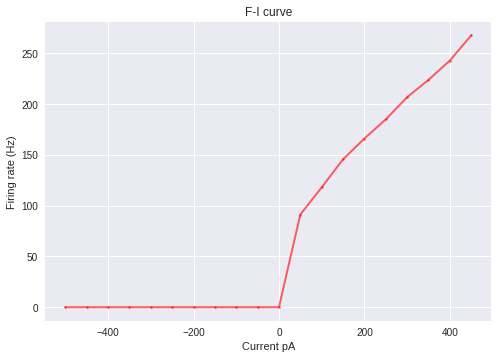

In [42]:
plt.figure()
plt.plot(results['Current Injection'].values, results['Firing Rate'].values, ".-", color="r", lw=2,
         markersize=5, alpha=0.6)
plt.xlabel('Current '+meta['ch2_units'][0])
plt.ylabel('Firing rate (Hz)')
plt.title('F-I curve')
plt.show()

Cool, we now have an F-I curve for this PV neuron. 

### Excercise, do the same analysis but calculate frequency as n_spikes/time instead of using the ISI as we just did
* Add the result to the data frame called results and name this column "Firing rate (avg)"
* hint: one way to add a column to a data frame is to make a series and then add it to the original data frame
    * newcolumn = pd.series(index=, name=)
    * pd.concat((results,newcolumn),axis=1)
* Once you've accomplished all this, plot the results alongside the trace above

In [43]:
# Make a new column using a pandas series (new column = pd.Series)
newColumn = pd.Series(index=sweeps, name="Firing Rate (avg)")

In [44]:
for i, sweep in enumerate(sweeps):
    
    firing_rate = get_firing_rate(data['ch1_'+sweep],threshold,I_start,I_end, method="AVG")
  
    I_mag = max(data['ch2_'+sweep])
    if I_mag == 0 and min(data['ch2_'+sweep])==0:
        I_mag = 0
    elif I_mag == 0 and min(data['ch2_'+sweep]) != 0:
        I_mag = min(data['ch2_'+sweep])
    
    newColumn[sweep]=firing_rate

In [45]:
results = pd.concat((results,newColumn),axis=1)
results.head()

,Current Injection,Firing Rate,Firing Rate (avg)
sweep1,-500,0,0.0
sweep2,-450,0,0.0
sweep3,-400,0,0.0
sweep4,-350,0,0.0
sweep5,-300,0,0.0


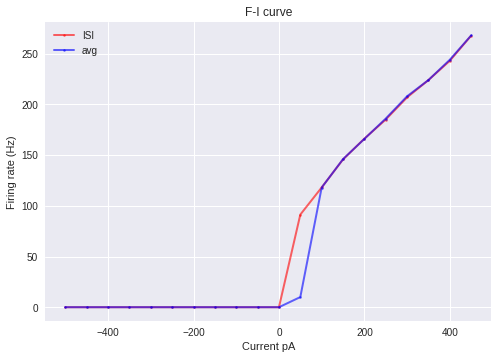

In [46]:
plt.figure()
plt.plot(results['Current Injection'].values, results['Firing Rate'].values, ".-", color="r", lw=2,
         markersize=5, alpha=0.6)
plt.plot(results['Current Injection'].values, results['Firing Rate (avg)'].values, ".-", color="b", lw=2,
         markersize=5, alpha=0.6)
plt.xlabel('Current '+meta['ch2_units'][0])
plt.ylabel('Firing rate (Hz)')
plt.legend(['ISI', 'avg'])
plt.title('F-I curve')
plt.show()

Basically, we get the same result. However, we do see a clear difference for the first positive current step, when the cell did not continue to fire over the course of the current injection but only fired a burst of spikes at the beginning of stimulation

## Let's now load the data for multiple cells, and perform this same analysis for all of them at once

In [47]:
# Creating csv's for all the data files in raw_data

from os import listdir    # Function used to list all objects inside a folder

allData = listdir(path+'Raw_Data/')  # get a list of all data files in the folder
allData = [f for f in allData if f[-3:]=="abf"]  # use list comprehension to get only files ending in abf

# loop over all files and create csv's
for f in allData:
    _, _ = binary_to_csv(filename=path+"Raw_Data/"+f)  # Using underscores is common practice when you don't care about saving a function's output


OSError: [Errno 2] No such file or directory: '/home/charlie/Desktop/python_bootcamp/python_neurobootcamp/day-3/csv_data/Raw_Data/'

In [48]:
allCsvs = listdir(path+"csv_data")
for f in allCsvs:
    if "meta" in f:
        meta = pd.read_csv(path+"csv_data/"+f, index_col=0)
        print meta.columns

SyntaxError: invalid syntax (<ipython-input-48-3ce03e217b52>, line 5)

# Note:
* looks like there are issues with the data I got from Tim. (There are no current traces for any of the files except the one I already analyzed above). Need to talk to him before I proceed here...

My plan was/is to read in all the files and create a dictionary of data frames. Each entry in the dictionary would be a neuron and it would contain two data frames: meta data and data (like we have above). Then I'd loop through these cells, do the analysis, save results in a new results data frame (that has results for all the cells). Using this results data frame, could then do some visualization/summary of the data based on if neurons were pyramidal neurons or PV neurons.